# Восстановление золота из руды

Необходимо подготовить прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. 
Будем использовать данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.


План работы.
- Загрузить и изучить данные.
- Проверить правильность расчета эффективности.
- Проанализировать признаки в тестовой выборке.
- Подготовить данные.
- Проанализировать данные.
- Подготовить для моделей.
- Выбрать модели с лучшим качеством. 
- Проверить модели на тестовой выборке.


## Подготовка данных

In [1]:
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 
from scipy import stats as st 

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import ElasticNet,Lasso, LinearRegression 
from sklearn.metrics import make_scorer, mean_absolute_error 
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor 

Загрузили необходимые библиотки.

### Загрузка данных

In [2]:
try:
    df_full = pd.read_csv('/datasets/gold_recovery_full.csv')
    df_test = pd.read_csv('/datasets/gold_recovery_test.csv')
    df_train = pd.read_csv('/datasets/gold_recovery_train.csv')
except: 
    df_full = pd.read_csv('datasets/gold_recovery_full.csv') 
    df_test = pd.read_csv('datasets/gold_recovery_test.csv')
    df_train = pd.read_csv('datasets/gold_recovery_train.csv') 

Прочитали датасеты.

### Изучение общей информации

In [3]:
display(df_full.head())
display(df_test.head())
display(df_train.head())

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


Посморели общую информацию в датасетах. 

### Проверка правильности расчета эффективности обогащения.

In [4]:
stages = {'rougher':'Флотация', 
          'primary_cleaner':'Первичная очистка', 
          'secondary_cleaner':'Вторичная очистка', 
          'final':'Финальная',}
products = ['ag', 'pb', 'sol', 'au']


In [5]:
def calculate_rougher_recovery(data):
    return ((data['rougher.output.concentrate_au'] * 
            (data['rougher.input.feed_au'] -
            data['rougher.output.tail_au']))/
            (data['rougher.input.feed_au'] * 
            (data['rougher.output.concentrate_au'] -
            data['rougher.output.tail_au'])) * 100)

In [6]:
rougher_calculation_recovery = calculate_rougher_recovery(df_train.dropna()) 

In [7]:
mae = mean_absolute_error(df_train.dropna()['rougher.output.recovery'], rougher_calculation_recovery)
print(f'Средняя абсолютная ошибка = {mae:.15f}')

Средняя абсолютная ошибка = 0.000000000000010


**Вычислили эффективность обогащения на обучающей выборке для признака rougher.output.recovery. НАшли MAE между расчётами и значением признака. Средняя абсолютная ошибка получилась незначительной, можем считать, что эффективность обогащения в данных рассчитана верно.**

### Анализ признаков в тестовой выборке. 

Посмотрим, каких данных нет в тестовой выборке.

In [8]:
columns_train = set(df_train.columns)
columns_test = set(df_test.columns)
(columns_train-columns_test) 

{'final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.ta

**В тестовой выборе отсутствуют выходные данные по каждой стадии обработки руды и расчетные величины, они не имеют значения для предсказания, так как заполняются после начала обработки, поэтому мы можем удалить их из обучающей выборки. Кроме того, в тестовой выборке отсутствует целевой признак. Для проверки модели заполним его из полных данных.** 

In [9]:
df_full.index = list(df_full['date'])
df_test.index = list(df_test['date'])
df_train.index = list(df_train['date'])

In [10]:
df_test['rougher.output.recovery'] = df_full.loc[df_test.index][ 'rougher.output.recovery'] 
df_test['final.output.recovery'] = df_full.loc[df_test.index][ 'final.output.recovery'] 

**Заполнили целевой признак в тестовой выборке**

### Предобработка данных

Изучим пропуски. 

In [11]:
print(df_test.isna().mean())
print(df_train.isna().mean())

date                                          0.000000
primary_cleaner.input.sulfate                 0.051571
primary_cleaner.input.depressant              0.048497
primary_cleaner.input.feed_size               0.000000
primary_cleaner.input.xanthate                0.028347
primary_cleaner.state.floatbank8_a_air        0.002732
primary_cleaner.state.floatbank8_a_level      0.002732
primary_cleaner.state.floatbank8_b_air        0.002732
primary_cleaner.state.floatbank8_b_level      0.002732
primary_cleaner.state.floatbank8_c_air        0.002732
primary_cleaner.state.floatbank8_c_level      0.002732
primary_cleaner.state.floatbank8_d_air        0.002732
primary_cleaner.state.floatbank8_d_level      0.002732
rougher.input.feed_ag                         0.002732
rougher.input.feed_pb                         0.002732
rougher.input.feed_rate                       0.006831
rougher.input.feed_size                       0.003757
rougher.input.feed_sol                        0.011441
rougher.in

Нам известно, что соседние по времени параметры могит быть похожи, поэтому сначала заполним пропуски соседними значениями.

In [12]:
df_train = df_train.loc[~df_train['final.output.recovery'].isna() & ~df_train['rougher.output.recovery'].isna()]

In [13]:
df_test = df_test.loc[~df_test['final.output.recovery'].isna() & ~df_test['rougher.output.recovery'].isna()]

In [14]:
df_train = df_train.fillna(method='ffill')
df_test = df_test.fillna(method='ffill')

In [15]:
df_train = df_train.drop(list((columns_train-columns_test) - {'final.output.recovery', 'rougher.output.recovery'}), axis = 1) 
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14149 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 55 columns):
date                                          14149 non-null object
final.output.recovery                         14149 non-null float64
primary_cleaner.input.sulfate                 14149 non-null float64
primary_cleaner.input.depressant              14149 non-null float64
primary_cleaner.input.feed_size               14149 non-null float64
primary_cleaner.input.xanthate                14149 non-null float64
primary_cleaner.state.floatbank8_a_air        14149 non-null float64
primary_cleaner.state.floatbank8_a_level      14149 non-null float64
primary_cleaner.state.floatbank8_b_air        14149 non-null float64
primary_cleaner.state.floatbank8_b_level      14149 non-null float64
primary_cleaner.state.floatbank8_c_air        14149 non-null float64
primary_cleaner.state.floatbank8_c_level      14149 non-null float64
primary_cleaner.state.floatbank8_d_ai

In [16]:
df_test.info()


<class 'pandas.core.frame.DataFrame'>
Index: 5290 entries, 2016-09-01 00:59:59 to 2017-12-31 23:59:59
Data columns (total 55 columns):
date                                          5290 non-null object
primary_cleaner.input.sulfate                 5290 non-null float64
primary_cleaner.input.depressant              5290 non-null float64
primary_cleaner.input.feed_size               5290 non-null float64
primary_cleaner.input.xanthate                5290 non-null float64
primary_cleaner.state.floatbank8_a_air        5290 non-null float64
primary_cleaner.state.floatbank8_a_level      5290 non-null float64
primary_cleaner.state.floatbank8_b_air        5290 non-null float64
primary_cleaner.state.floatbank8_b_level      5290 non-null float64
primary_cleaner.state.floatbank8_c_air        5290 non-null float64
primary_cleaner.state.floatbank8_c_level      5290 non-null float64
primary_cleaner.state.floatbank8_d_air        5290 non-null float64
primary_cleaner.state.floatbank8_d_level      5290

In [17]:
df_train = df_train.drop(['date'], axis = 1)
df_test = df_test.drop(['date'], axis = 1)

Удалили колонку date, для модели она не имеет смысла. 

Убедимся, что после всех манипуляций структуры датасетов одинаковы.

In [18]:
set(df_test.columns) == set(df_train.columns )

True

**Мы избавились от признаков, которых нет в тестовой выборке, заполнили пустые значения, те, который не смогли заполнить, удалили. В результате получили обучающую и тестовую выборки одной труктуры.** 

## Анализ данных

### Анализ концентрации металлов (Au, Ag, Pb) на различных этапах очистки.

In [19]:
stages = {'rougher.input.feed_':'Сырьё   ', 
          'rougher.output.concentrate_':'Флотация ', 
          'primary_cleaner.output.concentrate_':'Первичная', 
          'final.output.concentrate_':'Финальная',}
products = ['ag', 'pb', 'au']

for stage in stages:
    print(f'{stages[stage]}', end='\t') 
    for product in products:
        column = f'{stage}{product}' 
        print(f'{product} - {df_full[column].mean():.02f}', end='\t')
    print( )    


Сырьё   	ag - 8.07	pb - 3.31	au - 7.57	
Флотация 	ag - 10.87	pb - 6.90	au - 17.88	
Первичная	ag - 7.69	pb - 8.92	au - 29.21	
Финальная	ag - 4.78	pb - 9.10	au - 40.00	


**Мы видим, что содержание Ag выше после флотации, а при дальнейшей очистки падает. Содержание Pb и Au растёт на каждой стадии очистки**

### Сравнение распределения размеров гранул сырья на обучающей и тестовой выборках.

In [20]:
data = [df_train, df_test]
column = 'rougher.input.feed_size' 

Средний размер гранул на обучающей выборке: 60.23985599255732
Средний размер гранул на тестовой выборке: 55.95275402889513


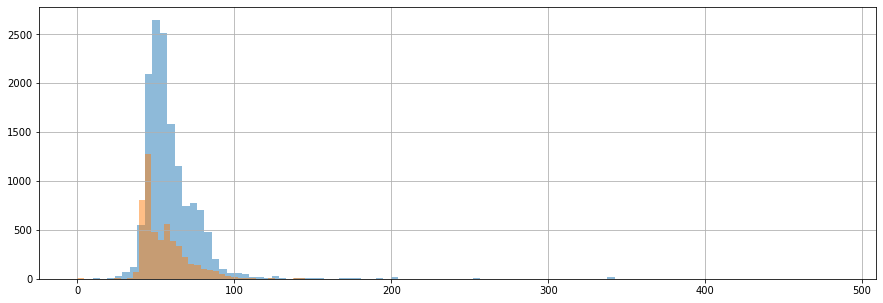

In [21]:
print(f'Средний размер гранул на обучающей выборке: {df_train[column].mean()}')
print(f'Средний размер гранул на тестовой выборке: {df_test[column].mean()}')
for df in data:
    df[column].hist(bins = 100, 
                    alpha=0.5,
                    figsize = (15, 5))  

Средние значения отличаются, но графики выглядят похоже, можем предположить, что распределения всё-таки одинаковы. 
Проверим это.

In [22]:
results = st.ttest_ind(df_train[column], df_test[column], axis=0)
print(f'pvalue: {results.pvalue}')
if results.pvalue < 0.05:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

pvalue: 1.6081245670847274e-33
Отвергаем нулевую гипотезу


**Нам не удалось подтвердить, что распределения размеров гранул одинаковы, поэтому не будем использовать эту колонку для построения модели.**

In [23]:
df_train = df_train.drop([column], axis = 1)
df_test = df_test.drop([column], axis = 1)

**Удаляем признак и выборок**

### Исследование суммарной концентрации всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах.

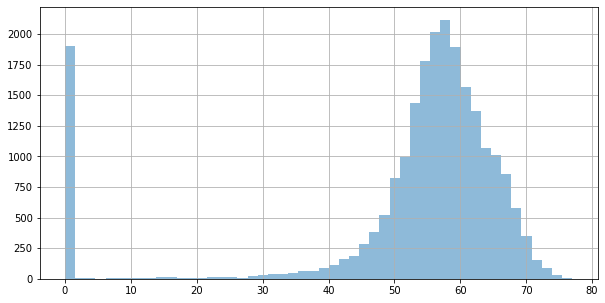

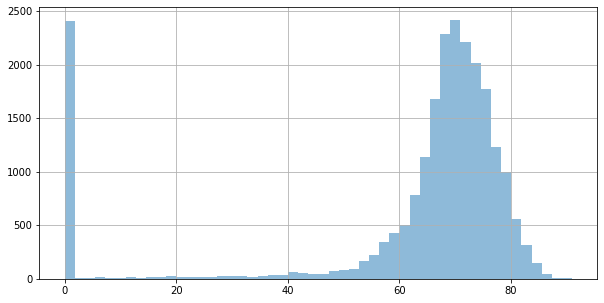

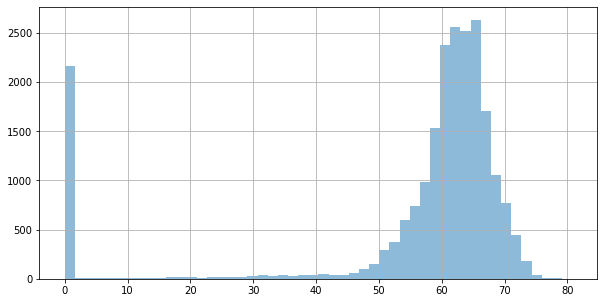

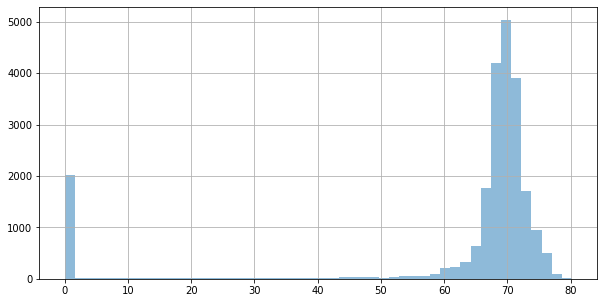

In [24]:
stages = {'rougher.input.feed_':'Сырьё   ', 
          'rougher.output.concentrate_':'Флотация ', 
          'primary_cleaner.output.concentrate_':'Первичная', 
          'final.output.concentrate_':'Финальная',}
products = ['ag', 'pb', 'au', 'sol']

for stage in stages:
    column = f'{stage}'
    (df_full[column+'ag']+df_full[column+'pb']+df_full[column+'au']+df_full[column+'sol']).hist(bins = 50, 
              alpha=0.5,
              figsize = (10, 5))
    plt.show()

Мы видим, что есть строки с нулевой суммарной концентрацией веществ, эффективность очистки для таких строк нельзя определить, поэтому исключим эти данные из модели. 

In [25]:
for stage in stages:
    no_null = df_full.loc[df_train.index].loc[(df_full[stage + 'ag'] +
                                 df_full[stage + 'pb'] +
                                 df_full[stage + 'au'] +
                                 df_full[stage + 'sol']) > 0]
    df_train = df_train.loc[no_null.index]


In [26]:
for stage in stages:
    no_null = df_test.loc[df_test.index].loc[(df_full[stage + 'ag'] +
                                 df_full[stage + 'pb'] +
                                 df_full[stage + 'au'] +
                                 df_full[stage + 'sol']) > 0]
    df_test = df_test.loc[no_null.index]

In [27]:
df_test.info()
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5040 entries, 2016-09-01 00:59:59 to 2017-12-31 23:59:59
Data columns (total 53 columns):
primary_cleaner.input.sulfate                 5040 non-null float64
primary_cleaner.input.depressant              5040 non-null float64
primary_cleaner.input.feed_size               5040 non-null float64
primary_cleaner.input.xanthate                5040 non-null float64
primary_cleaner.state.floatbank8_a_air        5040 non-null float64
primary_cleaner.state.floatbank8_a_level      5040 non-null float64
primary_cleaner.state.floatbank8_b_air        5040 non-null float64
primary_cleaner.state.floatbank8_b_level      5040 non-null float64
primary_cleaner.state.floatbank8_c_air        5040 non-null float64
primary_cleaner.state.floatbank8_c_level      5040 non-null float64
primary_cleaner.state.floatbank8_d_air        5040 non-null float64
primary_cleaner.state.floatbank8_d_level      5040 non-null float64
rougher.input.feed_ag                         504

**Мы удалили аномальные значения, которые могут повлиять на качество модели.**

## Модель

### Определение метрики

In [28]:
def smape(target, prediction):
    return (abs(target - prediction) / ((abs(target) + abs(prediction)) / 2)).sum() / len(target) * 100

def final_smape(smape_rougher, smape_final):
    return .25 * smape_rougher + .75 * smape_final

Определили функции для расчета метрики sMape

### Выделение целевых признаков, масштабирование

In [29]:
target_final_train = df_train['final.output.recovery'] 
target_rougher_train = df_train['rougher.output.recovery'] 
features_train = df_train.drop(['final.output.recovery', 'rougher.output.recovery'], axis = 1 )
df_test = df_test.dropna()                           
target_final_test = df_test['final.output.recovery'] 
target_rougher_test = df_test['rougher.output.recovery'] 
features_test = df_test.drop(['final.output.recovery', 'rougher.output.recovery'], axis = 1 )

Выделили целевые признаки.

In [30]:
scaler = StandardScaler()
features_train  = pd.DataFrame(scaler.fit_transform(features_train)) 
features_test = pd.DataFrame(scaler.transform(features_test)) 

Масштабироваль признаки

**Данные подготовлены для моделей.**

### Выбор моделей, подбор параметров

Опишем функцию, которая будет подбирать параметры для разных алгоритмов обучения и выберет лучшую модель. 

In [31]:
def get_best_model(features_train, target_train):
    models =  [{'name': 'LinearRegression',
                'algorithm': LinearRegression,
                'parametrs': {},
                'best_params': {},},  
                {'name': 'Lasso',
                'algorithm': Lasso,
                'parametrs': {'alpha': [i/10 for i in range(1,10)]},
                'best_params': {},},
                {'name': 'ElasticNet',
                'algorithm': ElasticNet,
                'parametrs': {'alpha': [i/10 for i in range(1,10)]},
                'best_params': {},},
                {'name': 'DecisionTreeRegressor',
                'algorithm': DecisionTreeRegressor, 
                 'parametrs': {'max_depth': range (2, 10)}, 
                 'best_params': {},},]    
    best_model_id = 0
    for i, model in enumerate(models):
        grid = GridSearchCV(model['algorithm'](), model['parametrs'], scoring=make_scorer(smape), cv=5)
        grid.fit(features_train, target_train) 
        model['best_params'] = grid.best_params_
        model['best_score'] = grid.best_score_
        if model['best_score'] < models[best_model_id]['best_score']:
            best_model_id = i
        print(f"Алгоритм - {model['name']}\t параметры - {model['best_params']}\t - smape - {model['best_score']:.04f}")
    return models[best_model_id]

Подберем лучшую модель для этапа флотации.

In [32]:
%%time
model_rougher = get_best_model(features_train, target_rougher_train)


Алгоритм - LinearRegression	 параметры - {}	 - smape - 6.9830
Алгоритм - Lasso	 параметры - {'alpha': 0.9}	 - smape - 6.8139
Алгоритм - ElasticNet	 параметры - {'alpha': 0.9}	 - smape - 6.3479
Алгоритм - DecisionTreeRegressor	 параметры - {'max_depth': 6}	 - smape - 11.7501
CPU times: user 59.6 s, sys: 2min 1s, total: 3min 1s
Wall time: 3min 2s


In [33]:
print(f"Лучшая модель для флотации: - {model_rougher['name']}\t"
      f"параметры - {model_rougher['best_params']}\t"
      f"- smape - {model_rougher['best_score']:.04f}")

Лучшая модель для флотации: - ElasticNet	параметры - {'alpha': 0.9}	- smape - 6.3479


Подберем лучшую модель для финальной очистки.

In [34]:
%%time
model_final = get_best_model(features_train, target_final_train)


Алгоритм - LinearRegression	 параметры - {}	 - smape - 10.0896
Алгоритм - Lasso	 параметры - {'alpha': 0.1}	 - smape - 9.0986
Алгоритм - ElasticNet	 параметры - {'alpha': 0.1}	 - smape - 9.0662
Алгоритм - DecisionTreeRegressor	 параметры - {'max_depth': 9}	 - smape - 11.8114
CPU times: user 30.3 s, sys: 31.9 s, total: 1min 2s
Wall time: 1min 3s


In [35]:
print(f"Лучшая модель для финальной очистки: - {model_final['name']}\t"
      f"параметры - {model_final['best_params']}\t"
      f"- smape - {model_final['best_score']:.04f}")

Лучшая модель для финальной очистки: - ElasticNet	параметры - {'alpha': 0.1}	- smape - 9.0662


Посчитаем итоговую sMape.

In [36]:
smape_all = final_smape(model_rougher['best_score'], model_final['best_score'])
print(f'Итоговая sMape = {smape_all:.04f}')

Итоговая sMape = 8.3867


**Мы подобрали лучшие модели для каждого целевого признака:**
- для `rougher.output.recovery`: алгоритм ElasticNet(alpha=0.9), получили sMape = 6.3479
- для `final.output.recovery`: алгоритм ElasticNet(alpha=0.1), получили sMape = 9.0662

- Итоговая sMape = 8.3867

### Проверка модели на тестовых данных

In [37]:
model = model_rougher['algorithm'](**model_rougher['best_params'])
model.fit(features_train, target_rougher_train)
prediction = model.predict(features_test) 
smape_rougher = smape(target_rougher_test.ravel(), prediction)
print(f'  {smape_rougher:.04f}')

  3.9049


In [38]:
model = model_final['algorithm'](**model_final['best_params'])
model.fit(features_train, target_final_train)
prediction = model.predict(features_test) 
smape_final = smape(target_final_test.ravel(), prediction)
print(f'  {smape_final:.04f}') 

  7.3947


In [39]:
smape_all_test = final_smape(smape_rougher, smape_final)
print(f'Итоговая sMape = {smape_all_test:.04f}')

Итоговая sMape = 6.5223


**На тестовой выборке получены следующие результаты:**
- для `rougher.output.recovery`  получили sMape = 3.9049
- для `final.output.recovery` получили sMape = 7.3947

- Итоговая sMape = 6.5223


## Вывод

**Для прогнозирования мы подготовили данные и обучили различные модели. Были использованы алгоритмы LinearRegression, Lasso, ElasticNet и DecisionTreeRegressor. Использована функция GridSearchCV, которая методом кросс-валидации подобрала наилучшие параметры для каждого алгоритма.**

**Лучшие метрики показали модели ElasticNet(alpha=0.9) для этапа флотации, и ElasticNet(alpha=0.1) для финальной очистки.**

**Достигнуты метрики sMape 6.3479 для этапа флотации, и 9.0662 для финальной очистки.** 

**Итоговая sMape = 8.3867**

**На тестовой выборке получены метрики sMape 3.9049 для этапа флотации, и 7.3947 для финальной очистки**

**Итоговая sMape на тестовой выборке = 6.5223**